Import the data

Import the library

In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import scipy
import matplotlib
from scipy import ndimage

Part 1 - Data Preprocessing

Preprocessing the Training set

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   horizontal_flip=True,
                                   rotation_range=50,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2)
training_set = train_datagen.flow_from_directory(
    r'C:\Users\Dell\Desktop\5th Sem Data\self\Machine Learning\Sign Language Recognisation\Without camera access\Dataset\ASL\train',
    shuffle=True,
    classes=['A','B','C','D','del','E','F','G','H','I','J','K','L','M','N','nothing','O','P','Q','R','S','space','T','U','V','W','X','Y','Z'],
    target_size=(224,224),
    batch_size=32)

Found 87000 images belonging to 29 classes.


Preprocessing the Test set

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    r'C:\Users\Dell\Desktop\5th Sem Data\self\Machine Learning\Sign Language Recognisation\Without camera access\Dataset\ASL\test',
    classes=['A','B','C','D','del','E','F','G','H','I','J','K','L','M','N','nothing','O','P','Q','R','S','space','T','U','V','W','X','Y','Z'],
    target_size=(224,224),
    batch_size=32)

Found 0 images belonging to 29 classes.


Showing 8 images from training dataset

Part 2 - Building the CNN

Initialising the CNN

In [4]:
cnn = tf.keras.models.Sequential()

Step 1 - Convolution

In [19]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(224, 224, 3)))

Step 2 - Pooling

In [20]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Adding a second convolutional layer

In [21]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Flattening

In [22]:
cnn.add(tf.keras.layers.Flatten())

Full Connection

In [23]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

Output Layer

In [24]:
num_classes = len(training_set.class_indices)
cnn.add(tf.keras.layers.Dense(units=num_classes, activation='softmax'))

Part 3 - Training the CNN

Compiling the CNN

In [25]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Training the CNN on the Training set and evaluating it on the Test set

In [26]:
cnn.fit(training_set, validation_data=test_set, epochs=10)

Epoch 1/10


2719/2719 [==============================] - 3283s 1s/step - loss: 2.7702 - accuracy: 0.1884
Epoch 2/10
2719/2719 [==============================] - 3302s 1s/step - loss: 1.8051 - accuracy: 0.4240
Epoch 3/10
2719/2719 [==============================] - 4568s 2s/step - loss: 1.3322 - accuracy: 0.5585
Epoch 4/10
2719/2719 [==============================] - 3066s 1s/step - loss: 1.0532 - accuracy: 0.6424
Epoch 5/10
2719/2719 [==============================] - 3055s 1s/step - loss: 0.8963 - accuracy: 0.6930
Epoch 6/10
2719/2719 [==============================] - 6684s 2s/step - loss: 0.7912 - accuracy: 0.7279
Epoch 7/10
2719/2719 [==============================] - 3624s 1s/step - loss: 0.7269 - accuracy: 0.7490
Epoch 8/10
2719/2719 [==============================] - 2500s 919ms/step - loss: 0.6727 - accuracy: 0.7684
Epoch 9/10
2719/2719 [==============================] - 2377s 874ms/step - loss: 0.6398 - accuracy: 0.7803
Epoch 10/10
2719/2719 [==============================] -

Part 4 - Making a single prediction

In [5]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img(r'C:\Users\Dell\Desktop\5th Sem Data\self\Machine Learning\Sign Language Recognisation\Without camera access\Dataset\ASL\train\A\A16.jpg', target_size=(224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)

predicted_class_index = np.argmax(result)
print(predicted_class_index)
class_mapping = {i: label for label, i in training_set.class_indices.items()}

predicted_class_label = class_mapping[predicted_class_index]

print(predicted_class_label)

1/1 [==============================] - 0s 185ms/step
2


NameError: name 'training_set' is not defined

Showing the Predicted image

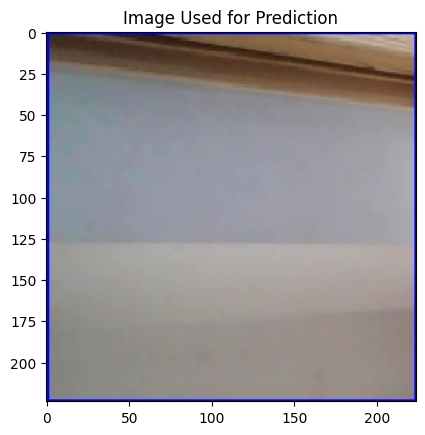

In [ ]:
test_image = image.load_img('/content/drive/MyDrive/asl/asl_alphabet_test/asl_alphabet_test/nothing_test.jpg', target_size=(224,224))
plt.imshow(test_image)
plt.title('Image Used for Prediction')
plt.show()

Save the model